/Users/wonbinchoi/current_studying/for_better_EDA


In [7]:
# 데이터와 표본분포

# 모집단 ==> 표본
# 층화표본추출
    # 해당 층에 높은 가중치를 주는 표본추출을 통해, 계층마다 동일한 표본 크기를 얻는 방법.
    

**2.3 통계학에서 표본분포**

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

loans_income = pd.read_csv('/Users/wonbinchoi/current_studying\
/Practical_Statistics_for_Data_Scientists/data/loans_income.csv')
loans_income.head()

,x
0,67000
1,52000
2,100000
3,78762
4,37041


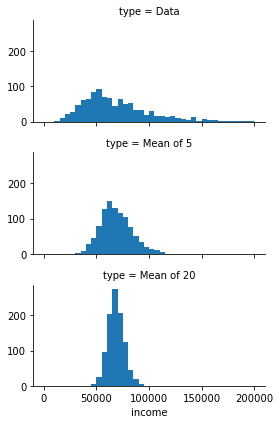

In [65]:
# 데이터 타입 잘 확인해보기
    # 데이터 타입 때문에 그래프 그리는 데 오래걸림. 
    
# 아래 그래프를 통해 알 수 있는 것
# ==> 원래의 데이터는 정규분포를 따르지 않으나, 표본통계량은 보통 정규분포를 따르는 것으로 나타남.
# ===> 중심 극한 정리. 
# : 모집단이 정규분포가 아니더라도, 표본 크기가 충분하고 데이터가 정규성을 크게 이탈하지 않는 경우 
#   여러 표본에서 추출한 평균은 종 모양의 정규 곡선을 따름. 
    
    
sample_data = pd.DataFrame({
    'income' : loans_income.sample(1000)['x'].values.tolist(),
    'type' : 'Data'
})

sample_mean_05 = pd.DataFrame({
    'income' : [loans_income.sample(5)['x'].mean() for _ in range(1000)],
    'type' : 'Mean of 5'
})

sample_mean_20 = pd.DataFrame({
    'income' : [loans_income.sample(20)['x'].mean() for _ in range(1000)],
    'type' : 'Mean of 20' 
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0,200000], bins=40)


In [ ]:
# 위의 그래프는 중심 극한 정리 소개를 위한 토대
### 부트스트랩으로 표준 표준 오차를 추정할 수 있음. ###

***2.4 부트스트랩***

In [ ]:
"""
애초에 한 개 밖에 없던 우리들의 smaple data set를 
n개의 sample data set를 가지고 있는 것과 같은
효과를 누릴 수 있게 도와줌.

즉, 원래 데이터셋으로부터 랜덤 샘플리을 통해 Training Data를 늘리는 방법
==> 데이터 양을 늘릴 수 있고 분포를 다르게 만들 수 있음.

이를 통해 나오는 것이 Bagging과 Boosting.


책에서의 정의 : 모집단에서 추가적으로 표본을 뽑는다고 할 때,
그 표본이 얼마나 원래 표본과 비슷할지 알려줌. 

부트 스트래핑은 복원 추출이고,
재표본추출은 비복원 추출. 
"""

***2.6 정규 분포***

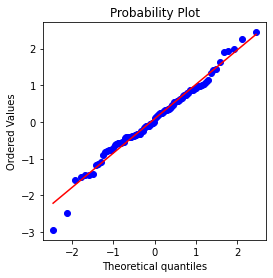

In [90]:
# 정규분포 그리기
from scipy import stats
fig, ax = plt.subplots(figsize=(4,4))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax);

In [94]:
nflx = pd.read_csv('/Users/wonbinchoi/current_studying/Practical_Statistics_for_Data_Scientists/data/sp500_data.csv.gz').NFLX

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
5642   -0.590004
5643   -2.211433
5644    0.725716
5645    0.491432
5646   -1.170006
Name: NFLX, Length: 5647, dtype: float64

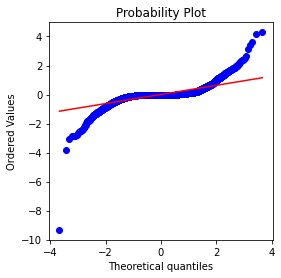

In [103]:
nlfx = np.diff(np.log(nflx[nflx>0]))
fig, ax = plt.subplots(figsize=(4,4))
stats.probplot(nflx, plot=ax)
plt.show()

***2.12.1 푸아송 분포***

In [119]:
# 시간 단위 혹은 공간 단위에서의 평균적인 사건의 수
# ==> 시간별 혹은 공간별로 사건 발생이 얼마나 다른지 알고 싶을 때
# 푸아송 분포는 시간 단위 또는 공간 단위로 표본들을 수집할 때, 그 사건들의 분포를 알려줌. 

# 핵심 파라미터 ==> 람다 : 어떤 일정 시간/공간의 구간 안에서 발생한 평균 사건 수를 의미. 
# 분산 역시 람다. 
from scipy import stats
stats.poisson.rvs(2, size=100)

# ex) 고객 서비스 센터에 1분당 평균 2회로 문의 전화가 접수된다면
# 이 코드는 100분을 시뮬레이션하여 100분당 문의 전화 횟수를 알려줌. 

array([1, 0, 0, 1, 3, 3, 2, 4, 1, 4, 1, 1, 2, 0, 3, 3, 2, 4, 1, 0, 4, 1,
       3, 3, 0, 3, 1, 3, 2, 0, 4, 4, 4, 1, 1, 4, 2, 3, 3, 3, 3, 2, 0, 2,
       1, 2, 1, 0, 2, 1, 0, 2, 6, 0, 0, 2, 3, 0, 3, 4, 3, 4, 2, 3, 1, 1,
       0, 1, 1, 2, 2, 3, 1, 2, 2, 3, 2, 2, 1, 4, 1, 4, 2, 4, 1, 1, 4, 3,
       4, 3, 2, 0, 3, 2, 2, 2, 3, 2, 2, 2])

***2.12.2 지수분포***

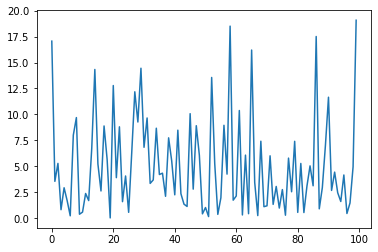

In [129]:
# 푸아송 분포에 사용된 것과 동일한 변수를 사용하여 사건과 사건 간의 시간 분포를 모델링. 


from scipy import stats
plt.plot(stats.expon.rvs(scale=1/0.2, size=100))
plt.plot(stats.expon.rvs(scale=5, size=100))

***2.12.4 베이풀 분포***

In [131]:
# 시간에 따라 변화하는 사건 발생률(예를 들어 증가하는 고정률)은 베이풀 분포로 모델링할 수 있다. 
from scipy import stats
stats.weibull_min.rvs(1.5, scale=5000, size=100)

array([10251.48139402,  2205.94934762,  5632.62676075,  7654.28945678,
        8518.70755816,  2003.26124191,  8377.20115488,   876.18664777,
        5381.95397436,   353.41625642,  5737.16563269,  3576.20435168,
       11867.65882915,  2822.12439619,    51.46466597,  3105.17798226,
        2776.69105233,  5439.70586445,  6028.44916846,  1480.38587903,
        4394.18202048,  1706.82848441,  5171.98025783,  3745.15527575,
        4130.08558636,  5966.23608663,  4320.58842612,  1642.80737612,
        2081.92551567,  9398.43672585,  4221.7115961 ,  3634.94688296,
        5522.12415765,  3415.26998404,  3736.04327295,  8062.7074403 ,
        6289.4315365 ,  6180.48105236,  3172.56436988,  5734.12941919,
        2754.18354757,  1605.85921136,  5709.52199702,  8498.07157854,
        3201.05623695,  2218.76736219,  4929.00014326,  5061.27905391,
        3028.36037037,   682.10293178,  4897.20923113,  2091.05276032,
        3944.45236368,  1861.49365645,  2652.87701211,  6448.77802267,
      